In [3]:
import csv
import copy
import matplotlib.pyplot as plt
import numpy as np

In [10]:
file = open("small_mapping.csv")
data = list(csv.reader(file))
data[0][0]

'nm0000131'

In [13]:
#first function
#The function should return a dictionary that maps IDs (as keys) to names (as values), 
#based on the file referenced by path
def get_mapping(path):
    file = open(path)
    data = list(csv.reader(file))
    dict_map = {}
    for i in data:
        dict_map[i[0]] = i[1]
    return dict_map

In [14]:
#Question 1: what is returned by your get_mapping("small_mapping.csv") function?
data = get_mapping("small_mapping.csv")
data

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [15]:
#Question 2: what is the value associated with the key "tt0313542"?
data["tt0313542"]

'Runaway Jury'

In [16]:
#Question 3: what are the values in the mapping associated with keys beginning with "tt"?
begin_tt = []
for keys in data:
    if keys[0:2] == 'tt':
        begin_tt.append(data[keys])
begin_tt

['Runaway Jury', 'Lethal Weapon']

In [17]:
#Question 4: which keys in the mapping map to people with a first name of "Gary"?
fisrt_gary = []
for keys in data:
    if data[keys][0:5] == "Gary ":
        fisrt_gary.append(keys)
fisrt_gary

['nm0000997', 'nm0001219']

In [18]:
#second function
#Build a function named get_raw_movies that takes a path to a movies CSV as a parameter and 
#returns a list of dictionaries where each dictionary represents a movie as follows:
def get_raw_movies(path):
    file = open(path)
    data = list(csv.reader(file))
    list_movies = []
    count = 0
    keys = data[0]
    for i in data[1:]:
        dict_movies = {}
        for j in range(len(keys)):
            if keys[j] == 'year':
                dict_movies[keys[j]] = int(i[j])
            elif keys[j] == 'rating':
                dict_movies[keys[j]] = float(i[j])
            elif keys[j] == 'title':
                dict_movies[keys[j]] = i[j]
            else:
                dict_movies[keys[j]] = i[j].split(',')
        list_movies.append(dict_movies)
    return list_movies

In [24]:
#
file = open('small_movies.csv')
data = list(csv.reader(file))
data[1]

['tt0313542',
 '2003',
 '7.1',
 'nm0001219',
 'nm0000131,nm0000432,nm0000163',
 'Crime,Drama,Thriller']

In [32]:
#
dict_movies = {}
keys = data[0]
i=data[1]
keys[5]
dict_movies[keys[5]] = i[5].split(',')
dict_movies[keys[5]]
i[5]

'Crime,Drama,Thriller'

In [34]:
#Question 5: what does get_raw_movies("small_movies.csv") return?
movies=get_raw_movies('small_movies.csv')
movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [35]:
#Question 6: how many genres did the movie at index 0 have?
len(movies[0]['genres'])

3

In [37]:
#Question 7: what is the ID of the last actor listed for the move at index 1?
movies[1]['actors'][-1]

'nm0752751'

In [39]:
#third function
#Write a function named get_movies(movies_path, mapping_path) 
#that loads data from the movies_path file using get_movies_raw and 
#converts the IDs to names using a mapping based on the mapping_path file, 
#which you should load using your get_mapping function.
def get_movies(movies_path, mapping_path):
    movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for i in movies:
        i['title'] = mapping.get(i['title'])
        for j in range(len(i['directors'])):
            i['directors'][j] = mapping.get(i['directors'][j])
        for j in range(len(i['actors'])):
            i['actors'][j] = mapping.get(i['actors'][j])
    return movies

In [43]:
#
movies = get_raw_movies("small_movies.csv")
mapping = get_mapping("small_mapping.csv")
i=movies[0]
mapping.get(i['title'])
i['directors'][0]
mapping.get(i['directors'][0])

'Gary Fleder'

In [45]:
#
small = get_movies("small_movies.csv", "small_mapping.csv")
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [46]:
#Question 8: what is small[0]["title"]?
small[0]["title"]

'Runaway Jury'

In [47]:
#Question 9: what is small[1]["directors"]?
small[1]["directors"]

['Richard Donner']

In [48]:
#Question 10: what is small[-1]["actors"]?
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [49]:
#Question 11: what is small?
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [56]:
#
movies = get_movies("movies.csv", "mapping.csv")
movies

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']},
 {'title': 'I Melt with You',
  'year': 2011,
  'rating': 6.0,
  'directors': ['Mark Pellington'],
  'actors': ['Thomas Jane', 'Rob Lowe', 'Jeremy Piven', 'Christian McKay'],
  'genres': ['Drama']},
 {'title': 'A Vision of Murder: The Story of Donielle',
  'year': 2000,
  'rating': 4.9,
  'directors': ['Donald Wrye'],
  'actors': ['Thomas Ian Griffith'],
  'genres': ['Drama', 'Mystery', 'Thrill

In [51]:
#Question 12: what are the first 3 rows in movies?
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [52]:
#Question 13: what are the last 3 rows in movies?
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [53]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [57]:
#Question 14: what are the movies from 1930?
filter_movies_by_year(movies.copy(), 1930)

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [59]:
#Question 15: what are the movies from 1931?
filter_movies_by_year(movies.copy(), 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [60]:
#function
def counting(data, element):
    list_counting = []
    for i in data:
        for j in range(len(i[element])):
            if i[element][j] not in list_counting:
                list_counting.append(i[element][j])
    return list_counting

In [61]:
#Question 16: how many unique genres are there in the dataset?
len(counting(movies, 'genres')) 

18

In [62]:
#Question 17: how many unique actor names are there in the dataset?
len(counting(movies, 'actors')) 

2605

In [63]:
#Question 18: how many unique director names are there in the dataset?
len(counting(movies, 'directors')) 

1247

In [64]:
#Question 19: what is the average movie rating?
avg_rating = 0
for i in movies:
    avg_rating += i['rating']
avg_rating = avg_rating / len(movies)
avg_rating

6.401659528907912

In [65]:
#Question 20: what is the longest movie title in the dataset (in terms of most characters)?
longest_title = ''
for i in movies:
    if len(i['title']) > len(longest_title):
        longest_title = i['title']
longest_title

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [66]:
#function: the result returned by the bucketize should be a dictionary of lists
def bucketize(movie_list, movie_key):
    bucket = {}
    for i in movie_list:
        if type(i[movie_key]) != list:
            for j in [i[movie_key]]:
                if j not in bucket:
                    bucket[j] = [i]
                else:
                    bucket[j].append(i)
        else:
            for j in i[movie_key]:
                if j not in bucket:
                    bucket[j] = [i]
                else:
                    bucket[j].append(i)
    return bucket

In [75]:
#
small
i=small[0] #i
[i['year']]

[2003]

In [74]:
small[0]['actors'] #j

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [76]:
#
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [77]:
#Question 21: what is bucketize(test_movies, "year")?
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [78]:
#Question 22: what is bucketize(test_movies, "style")?
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [79]:
#Question 23: what is bucketize(test_movies, "genres")?
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [80]:
#Question 24: what is bucketize(small, "genres")?
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [81]:
#Question 25: how many different unique actors appear in the small dataset?
bucketize(small, "actors")
len(bucketize(small, "actors"))

7

In [97]:
#Question 26: how many unique genres appear in the full dataset?
len(bucketize(movies, "genres"))
bucketize(movies, "genres")

{'Comedy': [{'title': 'The Big Wedding',
   'year': 2013,
   'rating': 5.6,
   'directors': ['Justin Zackham'],
   'actors': ['Robert De Niro'],
   'genres': ['Comedy', 'Drama', 'Romance']},
  {'title': 'The Barefoot Executive',
   'year': 1971,
   'rating': 6.0,
   'directors': ['Robert Butler'],
   'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
   'genres': ['Comedy', 'Family']},
  {'title': 'Life Begins for Andy Hardy',
   'year': 1941,
   'rating': 6.8,
   'directors': ['George B. Seitz'],
   'actors': ['Lewis Stone', 'Mickey Rooney'],
   'genres': ['Comedy', 'Romance']},
  {'title': 'The Family',
   'year': 2013,
   'rating': 6.3,
   'directors': ['Luc Besson'],
   'actors': ['Robert De Niro', "John D'Leo"],
   'genres': ['Comedy', 'Crime', 'Thriller']},
  {'title': 'Person to Person',
   'year': 2017,
   'rating': 5.7,
   'directors': ['Dustin Guy Defa'],
   'actors': ['Michael Cera', 'Bene Coopersmith'],
   'genres': ['Comedy', 'Drama']},
  {'title': 'Play

In [84]:
#Question 27: how many movies are there of each genre?
genres_movies = {}
bucket_genres = bucketize(movies, "genres")
for i in bucket_genres:
    genres_movies[i] = len(bucket_genres[i])
genres_movies

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [88]:
#Question 28: how many movies are there of each genre? (plot your answer)
genres_list = sorted(genres_movies.keys())
num_list = []
for i in sorted(genres_movies.keys()): num_list.append(genres_movies[i])
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

485

In [93]:
genres_list = sorted(genres_movies.keys())
sorted(genres_movies.keys())

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [94]:
num_list = []
for i in sorted(genres_movies.keys()): 
    num_list.append(genres_movies[i])
num_list    

[299,
 283,
 45,
 485,
 357,
 1094,
 85,
 59,
 73,
 85,
 38,
 121,
 352,
 69,
 48,
 250,
 99,
 226]

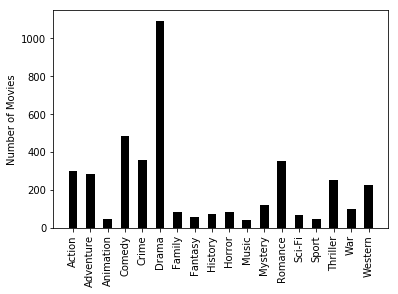

In [96]:
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

In [98]:
#Question 29: how many movies are there of each genre, prior to 2000? (plot your answer)
genres_movies_B2000 = copy.deepcopy(bucket_genres) #before
genres_movies_IA2000 = copy.deepcopy(bucket_genres) #in or after
for i in bucket_genres:
    for j in bucket_genres[i]:
        if j['year'] < 2000:
            genres_movies_IA2000[i].remove(j)
        else:
            genres_movies_B2000[i].remove(j)
genres_movies_B2000n = {}
genres_movies_IA2000n = {}
for i in genres_movies_B2000:
    genres_movies_B2000n[i] = len(genres_movies_B2000[i])
for i in genres_movies_IA2000:
    genres_movies_IA2000n[i] = len(genres_movies_IA2000[i])

In [99]:
bucket_genres

{'Comedy': [{'title': 'The Big Wedding',
   'year': 2013,
   'rating': 5.6,
   'directors': ['Justin Zackham'],
   'actors': ['Robert De Niro'],
   'genres': ['Comedy', 'Drama', 'Romance']},
  {'title': 'The Barefoot Executive',
   'year': 1971,
   'rating': 6.0,
   'directors': ['Robert Butler'],
   'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
   'genres': ['Comedy', 'Family']},
  {'title': 'Life Begins for Andy Hardy',
   'year': 1941,
   'rating': 6.8,
   'directors': ['George B. Seitz'],
   'actors': ['Lewis Stone', 'Mickey Rooney'],
   'genres': ['Comedy', 'Romance']},
  {'title': 'The Family',
   'year': 2013,
   'rating': 6.3,
   'directors': ['Luc Besson'],
   'actors': ['Robert De Niro', "John D'Leo"],
   'genres': ['Comedy', 'Crime', 'Thriller']},
  {'title': 'Person to Person',
   'year': 2017,
   'rating': 5.7,
   'directors': ['Dustin Guy Defa'],
   'actors': ['Michael Cera', 'Bene Coopersmith'],
   'genres': ['Comedy', 'Drama']},
  {'title': 'Play

In [100]:
genres_movies_B2000

{'Comedy': [{'title': 'The Barefoot Executive',
   'year': 1971,
   'rating': 6.0,
   'directors': ['Robert Butler'],
   'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
   'genres': ['Comedy', 'Family']},
  {'title': 'Life Begins for Andy Hardy',
   'year': 1941,
   'rating': 6.8,
   'directors': ['George B. Seitz'],
   'actors': ['Lewis Stone', 'Mickey Rooney'],
   'genres': ['Comedy', 'Romance']},
  {'title': 'Playing for Keeps',
   'year': 1986,
   'rating': 4.1,
   'directors': ['Harvey Weinstein', 'Bob Weinstein'],
   'actors': ['Daniel Jordano', 'Matthew Penn', 'Leon W. Grant'],
   'genres': ['Comedy']},
  {'title': 'Watch the Birdie',
   'year': 1950,
   'rating': 6.2,
   'directors': ['Jack Donohue'],
   'actors': ['Red Skelton', 'Leon Ames'],
   'genres': ['Comedy', 'Crime', 'Romance']},
  {'title': 'The Man Who Understood Women',
   'year': 1959,
   'rating': 4.8,
   'directors': ['Nunnally Johnson'],
   'actors': ['Henry Fonda', 'Cesare Danova', 'Myron 

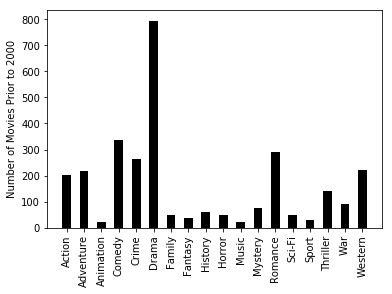

In [101]:
#q29
genres_list = sorted(genres_movies_B2000n.keys())
num_list = []
for i in sorted(genres_movies_B2000n.keys()): 
    num_list.append(genres_movies_B2000n[i])
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies Prior to 2000')
plt.show()

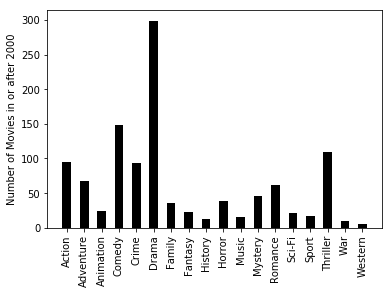

In [103]:
#Question 30: how many movies are there of each genre, in or after 2000? (plot your answer)
genres_list = sorted(genres_movies_IA2000n.keys())
num_list = []
for i in sorted(genres_movies_IA2000n.keys()): 
    num_list.append(genres_movies_IA2000n[i])
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies in or after 2000')
plt.show()

In [105]:
#
genres_movies_B2000n = {}
genres_movies_IA2000n = {}
for i in genres_movies_B2000:
    genres_movies_B2000n[i] = len(genres_movies_B2000[i])
for i in genres_movies_IA2000:
    genres_movies_IA2000n[i] = len(genres_movies_IA2000[i])

In [106]:
genres_movies_B2000n

{'Comedy': 337,
 'Drama': 795,
 'Romance': 290,
 'History': 61,
 'Family': 50,
 'Mystery': 75,
 'Thriller': 141,
 'Action': 204,
 'Crime': 264,
 'Adventure': 216,
 'Western': 220,
 'Music': 23,
 'Animation': 21,
 'Sport': 31,
 'Fantasy': 37,
 'War': 90,
 'Sci-Fi': 48,
 'Horror': 47}

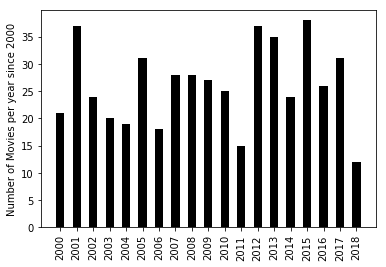

In [107]:
#Question 31: how many movies have there been per year, since (and including) 2000? (plot your answer)
years_movies = bucketize(movies, "year")
years_list = sorted(years_movies.keys())[-19:]
num_list = []
for i in years_list:
    num_list.append(len(years_movies[i]))
plt.bar(range(len(num_list)), num_list, tick_label=years_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies per year since 2000')
plt.show()

In [112]:
#Question 32: what are the directing career spans of the directors who have directed for at least 30 years?
directors_movies = bucketize(movies, "directors")
direc_year = {}
for i in directors_movies:
    years = []
    for j in directors_movies[i]:
        years.append(j['year'])
    direc_year[i] = max(years) - min(years)
direc_year_30 = {}
for i in direc_year:
    if direc_year[i] > 29:
        direc_year_30[i] = direc_year[i]
direc_year_30

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [123]:
j=directors_movies['Justin Zackham'][0] #j
j['year']
direc_year

{'Justin Zackham': 0,
 'Charles Shyer': 0,
 'Robert Butler': 3,
 'Mark Pellington': 12,
 'Donald Wrye': 0,
 'David Miller': 1,
 'George B. Seitz': 13,
 'Luc Besson': 0,
 'Norman Foster': 0,
 'Arthur Rosson': 0,
 'Howard Hawks': 42,
 'Dustin Guy Defa': 0,
 'Alfred Hitchcock': 16,
 'Harvey Weinstein': 0,
 'Bob Weinstein': 0,
 'Oliver Stone': 15,
 'Richard L. Bare': 0,
 'Jack Donohue': 0,
 'Robert N. Bradbury': 2,
 'Marcelo Briem Stamm': 0,
 'Marco Berger': 0,
 'Budd Boetticher': 7,
 'George Cukor': 22,
 'Arthur Ripley': 20,
 'Joshua Logan': 17,
 'Robert Benton': 15,
 'Kevin Fair': 0,
 'Nunnally Johnson': 0,
 'Peter McCarthy': 0,
 'Jim Wynorski': 16,
 'Claude Lelouch': 0,
 'William A. Seiter': 12,
 'Charles Chaplin': 34,
 'Jules Bass': 12,
 'Arthur Rankin Jr.': 12,
 'Jonas Åkerlund': 3,
 'J. Lee Thompson': 28,
 'Nell Cox': 0,
 'Brendan Malloy': 0,
 'Emmett Malloy': 0,
 'Bob Gale': 0,
 'Alan J. Pakula': 11,
 'Jon Avnet': 0,
 'Hayao Miyazaki': 24,
 'Edward Killy': 1,
 'Mervyn LeRoy': 22,
 '

In [124]:
#Question 33: what are the acting career spans of the actors who have acted for at least 40 years?
actors_movies = bucketize(movies, "actors")
act_year = {}
for i in actors_movies:
    years = []
    for j in actors_movies[i]:
        years.append(j['year'])
    act_year[i] = max(years) - min(years)
act_year_40 = {}
for i in act_year:
    if act_year[i] > 39:
        act_year_40[i] = act_year[i]
act_year_40

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [128]:
#Question 34: who are the 10 directors with the longest careers?
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        span = buckets[name]
        rows.append({"name": name, "span": span})
    rows.sort(key=row_ranking, reverse=True)
    return rows[0:n]
top_n_span(direc_year, 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [130]:
#Question 35: who are the 10 directors with the longest careers?
top_n_span(act_year, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [131]:
#Question 36: what are the three genres in which movies receive the highest median rating?
def row_rating_ranking(row):
    return row["rating"]

def top_n_rating(buckets, n, min_movies = 1):
    median_rating = []
    for i in buckets:
        rating = []
        for j in buckets[i]:
            rating.append(j['rating'])
        median = np.median(rating)
        return_dict = {'category': i, 'rating': median, 'count': len(buckets[i])}
        median_rating.append(return_dict)
    i = 0
    while i < len(median_rating):
        if median_rating[i]['count'] < min_movies:
            median_rating.pop(i)
        else:
            i += 1
    median_rating.sort(key=row_rating_ranking, reverse=True)
    return median_rating[0:n]
top_n_rating(bucket_genres, 3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [135]:
j=bucket_genres['Comedy'][0] #j
j['rating']

5.6

In [136]:
#Question 37: what were the 10 best years for movies?
top_n_rating(bucketize(movies, 'year'), 10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [137]:
#Question 38: what were the 5 best years for movies, if we only consider years with at least 10 movies?
top_n_rating(bucketize(movies, 'year'), n = 5, min_movies = 10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [138]:
#Question 39: who are the 6 best directors, if we only count directors having at least 3 movies?
top_n_rating(directors_movies, n = 6, min_movies = 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [139]:
#Question 40: who are the 3 best actors, if we only count actors having at least 5 movies?
top_n_rating(actors_movies, n = 3, min_movies = 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]